# 回帰分析+

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 回帰（ガウス基底）

## 訓練データ生成

In [2]:
x = np.linspace(0, 1, 10)
y = np.sin(2 * np.pi * x) + np.random.normal(scale=0.25, size=x.shape)
x_train = x
y_train = y

In [3]:
# 真値
xx = np.linspace(0, 1, 100)
y_true = np.sin(2 * np.pi * xx)

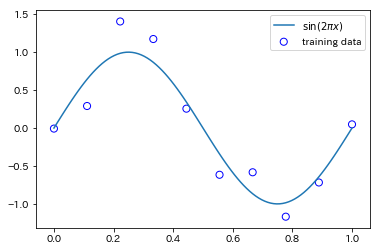

In [4]:
plt.scatter(x_train, y_train,facecolor="none", edgecolor="b", s=50,  label="training data")
plt.plot(xx, y_true, label="$\sin(2\pi x)$")
plt.legend()

## 学習

モデルとして以下を用いる。

$y(x) = \sum_{i=0}^{d} w_{i} x^{i} = \boldsymbol{w}^{\mathrm{T}} \boldsymbol{\phi(x)}$

ただし、$\boldsymbol{w}=[w_{0}, w_{1}, ..., w_{d}]^{\mathrm{T}}, \boldsymbol{\phi(x)} = [1, exp{(-\frac{(x-\mu_{1})^{2}}{2\sigma^{2}})}, xexp{(-\frac{(x-\mu_{2})^{2}}{2\sigma^{2}})}, ..., exp{(-\frac{(x-\mu_{d})^{2}}{2\sigma^{2}})}]^{\mathrm{T}}$である。

訓練データ$X = [x_{1}, x_{2}, ..., x_{n}]^{\mathrm{T}}, \boldsymbol{y} = [y_{1}, y_{2}, ..., y_{n}]^{\mathrm{T}}$に対しては
$\boldsymbol{y} = \Phi \boldsymbol{w}$と書ける。

ただし、$\Phi = [\boldsymbol{\phi}(x_{1}), \boldsymbol{\phi}(x_{2}),.., \boldsymbol{\phi}(x_{n})]^{\mathrm{T}}$である。

よって、最小化する目的関数は$L = ||\boldsymbol{y}  - \Phi \boldsymbol{w}||^2$と書け、

$\frac{\partial L}{\partial \boldsymbol{w}} = - 2 \Phi^{\mathrm{T}} (\boldsymbol{y} - \Phi \boldsymbol{w}) = 0$より、求める回帰係数$\boldsymbol{w}$は以下のように書ける。

$\hat{\boldsymbol{w}} = \left( \Phi^{\mathrm{T}} \Phi \right)^{-1}  \Phi^{\mathrm{T}} \boldsymbol{y}$

In [5]:
def gaussian_features(x, means, var):
    """ガウシアン基底ベクトルに変換"""
    X = np.ones((len(x), len(means)+1))
    X_t = X.T
    for i, mean in enumerate(means):
        X_t[i+1] = np.exp(-0.5 * (x - mean)**2 / var)
    return X_t.T

In [6]:
means = np.linspace(0, 1, 5)
var = 0.1
Phi = gaussian_features(x_train, means, var)
# w = np.dot(np.linalg.pinv(Phi), y_train)
pinv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(pinv, y_train)

## 予測

入力を多項式特徴ベクトル$\boldsymbol{\phi(x)}$に変換し、$y = \hat{\boldsymbol{w}} \boldsymbol{\phi(x)}\  (\boldsymbol{y}(x) = \Phi \hat{\boldsymbol{w}})$で予測する。

In [7]:
Phi_test = gaussian_features(xx, means, var)
y_pred = np.dot(Phi_test, w)

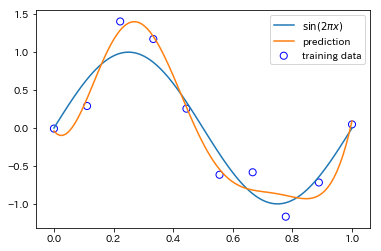

In [8]:
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xx, y_true, label="$\sin(2\pi x)$")
plt.plot(xx, y_pred, label="prediction")
plt.legend()
plt.show()

# リッジ回帰

## 学習

最小化する目的関数に重みパラメータの大きさの項$||\boldsymbol{w}||^{2}$を追加する。つまり、

$L = ||\boldsymbol{y}  - \Phi \boldsymbol{w}||^2 + \lambda ||\boldsymbol{w}||^{2}$

このとき、$\frac{\partial L}{\partial \boldsymbol{w}} = - 2 \Phi^{\mathrm{T}} (\boldsymbol{y} - \Phi \boldsymbol{w}) + 2 \lambda \boldsymbol{w} = 0$より、求める回帰係数$\boldsymbol{w}$は以下のように書ける。

$\hat{\boldsymbol{w}} = \left( \Phi^{\mathrm{T}} \Phi + \lambda I \right)^{-1}  \Phi^{\mathrm{T}} \boldsymbol{y}$

In [9]:
lam = 1e-3
pinv_ = np.dot(np.linalg.inv( np.dot(Phi.T, Phi)+ lam*np.eye(Phi.shape[1]) ), Phi.T)
w_ = np.dot(pinv_, y_train)

## 予測

$y = \hat{\boldsymbol{w}} \boldsymbol{\phi(x)}\  (\boldsymbol{y}(x) = \Phi \hat{\boldsymbol{w}})$で予測する。

In [10]:
y_pred = np.dot(Phi_test, w_)

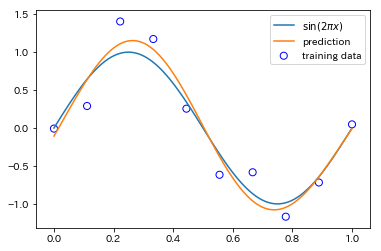

In [11]:
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xx, y_true, label="$\sin(2\pi x)$")
plt.plot(xx, y_pred, label="prediction")
plt.legend()
plt.show()